# Задание:

1) Исследуйте зависимость тестовой ошибки от количества деревьев в ансамбле для алгоритма forest Random на наборе данных Organics. Постройте график зависимости тестовой ошибки при числе деревьев, равном 1, 11, 21, . . . , 301, объясните полученные результаты.


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt

## Organics

In [2]:
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rc, plot
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.model_selection import train_test_split

In [3]:
%matplotlib inline
df=pd.read_csv("ORGANICS.csv",encoding="cp1251")

In [4]:
df.head(4)

,ID,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt
0,140,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,0,0
1,620,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,0,0
2,868,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,1,1
3,1120,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,1,1


In [5]:

print(df.shape) 
print(df.info())

(22223, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 13 columns):
ID                 22223 non-null int64
DemAffl            21138 non-null float64
DemAge             20715 non-null float64
DemCluster         21549 non-null float64
DemClusterGroup    21549 non-null object
DemGender          19711 non-null object
DemReg             21758 non-null object
DemTVReg           21758 non-null object
PromClass          22223 non-null object
PromSpend          22223 non-null float64
PromTime           21942 non-null float64
TargetBuy          22223 non-null int64
TargetAmt          22223 non-null int64
dtypes: float64(5), int64(3), object(5)
memory usage: 2.2+ MB
None


In [6]:
df['TargetBuy'].replace([0,1],['No','Buy'],inplace=True)
df

,ID,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt
0,140,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,No,0
1,620,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,No,0
2,868,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,Buy,1
3,1120,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,Buy,1
4,2313,11.0,68.0,4.0,A,F,Midlands,Midlands,Tin,0.01,8.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22218,52834058,13.0,65.0,9.0,B,F,South East,London,Silver,1500.00,5.0,No,0
22219,52834376,15.0,73.0,34.0,D,U,South East,S & S East,Gold,6053.06,12.0,No,0
22220,52837057,9.0,70.0,15.0,B,F,North,Yorkshire,Gold,6000.00,5.0,No,0
22221,52838096,11.0,66.0,8.0,B,F,North,N West,Silver,5000.00,5.0,No,0


In [7]:
df1= df.drop(df.columns[[0,12]], axis=1)

In [8]:
# for each column, get value counts in decreasing order and take the index (value) of most common class
df4 = df1.apply(lambda x: x.fillna(x.value_counts().index[0]))
print(df4.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 11 columns):
DemAffl            22223 non-null float64
DemAge             22223 non-null float64
DemCluster         22223 non-null float64
DemClusterGroup    22223 non-null object
DemGender          22223 non-null object
DemReg             22223 non-null object
DemTVReg           22223 non-null object
PromClass          22223 non-null object
PromSpend          22223 non-null float64
PromTime           22223 non-null float64
TargetBuy          22223 non-null object
dtypes: float64(5), object(6)
memory usage: 1.9+ MB
None


In [9]:
#import the necessary module
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
df4['DemClusterGroup'] = le.fit_transform(df4['DemClusterGroup'])
df4['DemGender'] = le.fit_transform(df4['DemGender'])
df4['DemReg'] = le.fit_transform(df4['DemTVReg'])
df4['DemTVReg'] = le.fit_transform(df4['DemTVReg'])
df4['PromClass'] = le.fit_transform(df4['PromClass'])
df4['TargetBuy'] = le.fit_transform(df4['TargetBuy'])
#display the initial records
df4.head(20)

,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy
0,10.0,76.0,16.0,2,2,11,11,0,16000.00,4.0,1
1,4.0,49.0,35.0,3,2,11,11,0,6000.00,5.0,1
2,5.0,70.0,27.0,3,0,11,11,2,0.02,8.0,0
3,10.0,65.0,51.0,5,1,4,4,3,0.01,7.0,0
4,11.0,68.0,4.0,0,0,4,4,3,0.01,8.0,1
5,9.0,72.0,28.0,3,2,7,7,1,20759.81,3.0,1
6,11.0,74.0,3.0,0,0,2,2,3,0.01,8.0,1
7,13.0,62.0,32.0,3,1,5,5,3,0.01,5.0,1
8,10.0,62.0,49.0,5,1,2,2,2,2038.76,3.0,1
9,14.0,43.0,49.0,5,0,3,3,0,6000.00,1.0,0


In [10]:
x=df4.values[:, 0:10]
y=df4.values[::,10]
print(x)
print(y)

[[1.0e+01 7.6e+01 1.6e+01 ... 0.0e+00 1.6e+04 4.0e+00]
 [4.0e+00 4.9e+01 3.5e+01 ... 0.0e+00 6.0e+03 5.0e+00]
 [5.0e+00 7.0e+01 2.7e+01 ... 2.0e+00 2.0e-02 8.0e+00]
 ...
 [9.0e+00 7.0e+01 1.5e+01 ... 0.0e+00 6.0e+03 5.0e+00]
 [1.1e+01 6.6e+01 8.0e+00 ... 2.0e+00 5.0e+03 5.0e+00]
 [3.0e+00 7.5e+01 5.3e+01 ... 0.0e+00 6.0e+03 2.0e+00]]
[1. 1. 0. ... 1. 1. 1.]


In [13]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = 10)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
from sklearn.ensemble  import  RandomForestClassifier 
tree_acc = pd.DataFrame(columns=['tree', 'score', 'Misclassified samples'])
n = 1
while n < 302 :
    rf = RandomForestClassifier(n_estimators=n,  max_features = 'sqrt',max_depth=6, min_samples_split=2, random_state=42)
    # Обучаем на тренировочных данных
    rf.fit(X_train, y_train)
    # Действующая классификация
    y_pred = rf.predict(X_test)
    n += 10
    count_misclassified = (y_test != y_pred).sum()
    tree_acc = tree_acc.append({'tree': n, 'score': rf.score(X_test, y_test),
                                'Misclassified samples': format(count_misclassified)}, ignore_index=True)

In [25]:
from sklearn.metrics import roc_auc_score

# Рассчитываем roc auc
roc_value = roc_auc_score(y_test, y_pred)
roc_value

0.6491401846735296

In [19]:
tree_acc

,tree,score,Misclassified samples
0,11,0.796310,1358
1,21,0.808460,1277
2,31,0.809510,1270
3,41,0.809060,1273
4,51,0.807860,1281
5,61,0.808610,1276
6,71,0.808310,1278
7,81,0.809360,1271
8,91,0.810859,1261
9,101,0.810859,1261


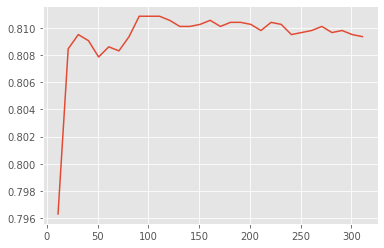

In [22]:
plt.plot(tree_acc['tree'], tree_acc['score'])

Оптимальное количество деревьев - около ста.

### 2) 
Исследуйте зависимость тестовой ошибки от количества деревьев в ансамбле для алгоритма bagging на наборе данных Organics. Постройте график зависимости тестовой ошибки при числе деревьев, равном 1, 11, 21, . . . , 301, объясните полученные результаты.

In [33]:
from sklearn.ensemble import BaggingClassifier
#bagging
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression

tree_acc_bagging = pd.DataFrame(columns=['tree', 'score', 'Misclassified samples'])
n = 1
while n < 302 :
    bag_model=BaggingClassifier(n_estimators=n, bootstrap=True)
    bag_model=bag_model.fit(X_train,y_train)
    y_pred_bag=bag_model.predict(X_test)
    n += 10
    count_misclassified = (y_test != y_pred).sum()
    tree_acc_bagging = tree_acc_bagging.append({'tree': n, 'score': bag_model.score(X_test, y_test),
                                'Misclassified samples': format(count_misclassified)}, ignore_index=True)

In [34]:
from sklearn.metrics import roc_auc_score

# Рассчитываем roc auc
roc_value = roc_auc_score(y_test, y_pred)
roc_value

0.6491401846735296

In [35]:
tree_acc_bagging

,tree,score,Misclassified samples
0,11,0.704065,1271
1,21,0.781161,1271
2,31,0.786411,1271
3,41,0.790310,1271
4,51,0.791960,1271
5,61,0.791960,1271
6,71,0.792560,1271
7,81,0.791810,1271
8,91,0.791060,1271
9,101,0.792860,1271


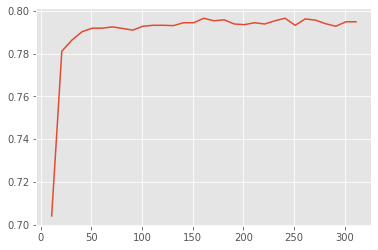

In [36]:
plt.plot(tree_acc_bagging['tree'], tree_acc_bagging['score'])

Оптимальное количество деревьев - около 40-50